In [1]:
import numpy as np
import sklearn
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data = pandas.read_csv('dataset_diabetes/diabetic_data.csv', ',')

In [3]:
df = pd.DataFrame.from_csv('dataset_diabetes/diabetic_data.csv')

In [4]:
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Preprocessing

In [5]:
df.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [6]:
# transform readmitted categories into numerical values
#readmittedEncoder = preprocessing.LabelEncoder()
#readmittedEncoder.fit(df.readmitted)
#df.readmitted = readmittedEncoder.transform(df.readmitted)

In [7]:
df.gender.unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [8]:
# transform genders into numerical values (female = 0, male = 1, unknown = 2)
genderEncoder = preprocessing.LabelEncoder()
genderEncoder.fit(df.gender)
df.gender = genderEncoder.transform(df.gender)

In [9]:
df.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [10]:
# transforms range string into a numerical value in the middle of the range
def rangeStringToMiddle(rangeString):
    rangeString = rangeString[1:-1] #remove brackets
    rangeString = str.split(rangeString, '-')
    return (int(rangeString[0]) + int(rangeString[1])) / 2

In [11]:
rangeStringToMiddle('[70-80)')

75

In [12]:
# transform age range into one numerical value
df.age = df.age.apply(rangeStringToMiddle)

In [13]:
df.weight.unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [14]:
# transforms age range string into an age in the middle of the range
def weightRangeToWeight(weightRange):
    if weightRange == '?':
        return 0
    if weightRange == '>200':
        return 200
    return rangeStringToMiddle(weightRange)

In [15]:
# transform weight range into one numerical value
df.weight = df.weight.apply(weightRangeToWeight)

In [16]:
df.weight.unique()

array([  0,  87,  62,  12, 112,  37, 137, 187, 162, 200])

In [17]:
df.race.unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'], dtype=object)

In [18]:
df.admission_type_id.unique()

array([6, 1, 2, 3, 4, 5, 8, 7])

In [19]:
df.admission_source_id.unique()

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [20]:
df.payer_code.unique()

array(['?', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [21]:
df.discharge_disposition_id.unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [22]:
df.medical_specialty.unique()

array(['Pediatrics-Endocrinology', '?', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology', 'Surgery-Plastic',
       'Surgery-Thoracic', 'Surgery-PlasticwithinHeadandNeck',
       'Ophthalmology', 'Surgery-Pediatric',
       'Pediatrics-EmergencyMedicine', 'PhysicalMedicineandRehabilit

In [23]:
df.diag_1 = preprocessing.LabelEncoder().fit_transform(df.diag_1)
df.diag_2 = preprocessing.LabelEncoder().fit_transform(df.diag_2)
df.diag_3 = preprocessing.LabelEncoder().fit_transform(df.diag_3)

In [24]:
# columns containing nominal values that will be split into categorical columns (one-hot)
categoricalColumns = ['readmitted', 'race', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty']

In [25]:
testResultsAndMedications = ['max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed'] # + ['diag_1', 'diag_2', 'diag_3']

In [26]:
# encode binary values into 0s and 1s, and multi-values into categorical columns
binaryTMColumns = []
nominalTMColumns = []
for colName in testResultsAndMedications:
    if len(df[colName].unique()) <= 2:
        binaryTMColumns.append(colName)
        df[colName] = preprocessing.LabelEncoder().fit_transform(df[colName])
    else:
        nominalTMColumns.append(colName)
        categoricalColumns.append(colName)

In [27]:
# create separate categorical column for each unique value
for columnName in categoricalColumns:
    oneHotColumns = pd.get_dummies(df[columnName], prefix=(columnName + '_'), prefix_sep='')
    df = df.join(oneHotColumns)

In [28]:
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,0,5,0,6,25,1,1,?,...,0,0,0,1,0,0,0,1,0,0
149190,55629189,Caucasian,0,15,0,1,1,7,3,?,...,0,0,0,0,0,1,0,1,0,0
64410,86047875,AfricanAmerican,0,25,0,1,1,7,2,?,...,0,0,0,1,0,0,0,1,0,0
500364,82442376,Caucasian,1,35,0,1,1,7,2,?,...,0,0,0,0,0,1,0,1,0,0
16680,42519267,Caucasian,1,45,0,1,1,7,1,?,...,0,0,0,0,1,0,0,1,0,0


In [29]:
for col in df.columns:
    print(col)

patient_nbr
race
gender
age
weight
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
payer_code
medical_specialty
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
diag_1
diag_2
diag_3
number_diagnoses
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted
readmitted_<30
readmitted_>30
readmitted_NO
race_?
race_AfricanAmerican
race_Asian
race_Caucasian
race_Hispanic
race_Other
admission_type_id_1
admission_type_id_2
admission_type_id_3
admission_type_id_4
admission_type_id_5
admission_type_id_6
admission_type_id_7
admission_type_id_8
discharge_disposition_id_1
discharge_disposition_id_2
discharge

# Training

In [30]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
import sklearn.feature_selection
from sklearn.model_selection import ShuffleSplit
from sklearn import tree
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [31]:
featureColumns = binaryTMColumns + ['diag_1', 'diag_2', 'diag_3', 'age', 'weight', 'gender', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']
nominalColumns = ['race', 'admission_type_id', 'change'] + nominalTMColumns

for col in df.columns:
    for colPrefix in nominalColumns:
        if col.find(colPrefix + '_') == 0:
            featureColumns.append(col)
            
labelColumns = ['readmitted_<30', 'readmitted_>30', 'readmitted_NO']
features = df[list(featureColumns)].values
#labels = df[list(labelColumns)].values
labels = df['readmitted'].values

In [32]:
df.isnull().values.any()

False

In [34]:
featureColumns

['acetohexamide',
 'tolbutamide',
 'troglitazone',
 'examide',
 'citoglipton',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'diag_1',
 'diag_2',
 'diag_3',
 'age',
 'weight',
 'gender',
 'time_in_hospital',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'race_?',
 'race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'admission_type_id_1',
 'admission_type_id_2',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'admission_type_id_6',
 'admission_type_id_7',
 'admission_type_id_8',
 'max_glu_serum_>200',
 'max_glu_serum_>300',
 'max_glu_serum_None',
 'max_glu_serum_Norm',
 'A1Cresult_>7',
 'A1Cresult_>8',
 'A1Cresult_None',
 'A1Cresult_Norm',
 'metformin_Down',
 'metformin_No',
 'metformin_Steady',
 'metformin_Up',
 'repaglinide_Down',
 'repaglinide_No',
 'repaglinide_Steady',
 'r

In [35]:
features

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

# Feature selection and extraction

In [36]:
trainFeatures = features

In [37]:
trainFeatures = StandardScaler().fit_transform(trainFeatures)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [38]:
trainFeatures = VarianceThreshold().fit_transform(trainFeatures)
vtIdx = VarianceThreshold().fit(trainFeatures).get_support(True)

In [171]:
pca = PCA(whiten=True)
pca.fit(trainFeatures)
trainFeatures = pca.transform(trainFeatures)

In [200]:
clf = LinearDiscriminantAnalysis()
#clf = QuadraticDiscriminantAnalysis()
#clf = OneVsRestClassifier(LinearDiscriminantAnalysis())
#clf = OneVsRestClassifier(QuadraticDiscriminantAnalysis())

In [39]:
clf = tree.DecisionTreeClassifier(max_depth=5)

In [212]:
#originalColumns = ['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']
#features = df[list(originalColumns)].values
clf = RandomForestClassifier(10, max_depth=5, class_weight='balanced')

In [177]:
clf = AdaBoostClassifier()

In [181]:
clf = GaussianNB()

In [ ]:
from sklearn.neural_network import MLPClassifier
clf =  MLPClassifier(verbose=True, hidden_layer_sizes=(100, 100), tol=-0.1, learning_rate_init=0.001, max_iter=200)

In [40]:
clf.fit(features,labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [ ]:
#clf.coef_

In [202]:
#cv = StratifiedKFold(3, shuffle=True)
cv = ShuffleSplit(10, test_size=0.05)
cv_score = cross_val_score(clf, trainFeatures, labels, scoring='accuracy',  n_jobs=1, verbose=2, cv=cv)
cv_score.mean()

[CV]  ................................................................
[CV] ................................................. , total=   2.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ................................................. , total=   2.0s
[CV]  ................................................................
[CV] ................................................. , total=   2.0s
[CV]  ................................................................
[CV] ................................................. , total=   2.0s
[CV]  ................................................................
[CV] ................................................. , total=   2.0s
[CV]  ................................................................
[CV] ................................................. , total=   2.0s
[CV]  ................................................................
[CV] ................................................. , total=   2.0s
[CV]  ................................................................
[CV] ................................................. , total=   2.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.2s finished


0.56588720770288847

In [ ]:
cv_score.mean()

In [195]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
lda = LinearDiscriminantAnalysis()
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

#rfecv = RFECV(estimator=lda, step=5, cv=StratifiedKFold(10, shuffle=True),
#              scoring='accuracy', verbose=2)
rfecv = RFECV(estimator=lda, step=1, cv=ShuffleSplit(1),
              scoring='accuracy', verbose=2)

In [196]:
#svc.fit(features[1:10000],labels[1:10000])

In [208]:
rfecv.fit(trainFeatures, labels)

Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.


LinAlgError: SVD did not converge

In [188]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

AttributeError: 'RFECV' object has no attribute 'n_features_'

In [ ]:
rfecv.grid_scores_

In [ ]:
cNames = [featureColumns[i] for i in vtIdx]
ccNames = [cNames[i] for i in rfecv.get_support(True)]
ccNames

In [ ]:
labels[400:700]

In [ ]:
clf.predict(features[400:700])

In [ ]:
np.unique(clf.predict(features))

In [ ]:
g = sns.factorplot(x='readmitted', data=df, kind='count', size=8)
g.set_axis_labels('x', 'y')

In [ ]:
df.readmitted.count()

In [ ]:
df.readmitted.where(df.readmitted == '>30').count()

In [210]:
#rfecv.get_support(True)
#rfecv.estimator_
clf.coef_
cdf = pd.DataFrame({'feature' : [featureColumns[i] for i in vtIdx], 'coef' : clf.coef_[0]})
cdf['coef_abs'] = cdf.coef.abs()
cdf.sort_values('coef_abs')
cdf

,coef,feature,coef_abs
0,-0.003238,acetohexamide,0.003238
1,-0.009665,tolbutamide,0.009665
2,-0.004784,troglitazone,0.004784
3,-0.003866,examide,0.003866
4,-0.004460,citoglipton,0.004460
5,-0.004535,glipizide-metformin,0.004535
6,-0.003113,glimepiride-pioglitazone,0.003113
7,0.002277,metformin-rosiglitazone,0.002277
8,0.077430,metformin-pioglitazone,0.077430
9,-0.019211,change,0.019211


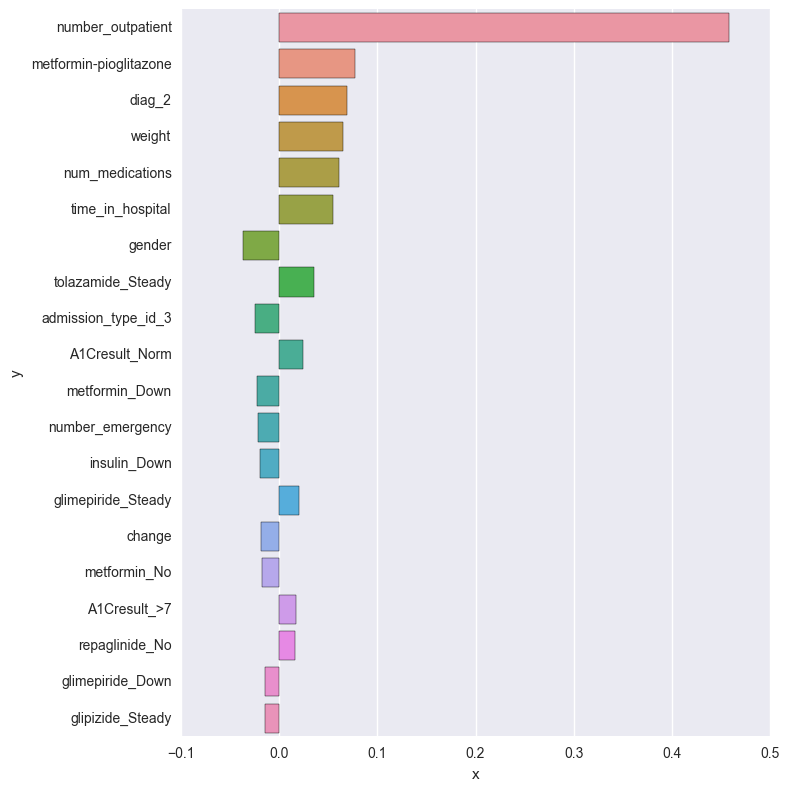

In [211]:
g = sns.factorplot(y='feature', x='coef', data=cdf.sort_values('coef_abs', ascending=False)[0:20], kind='bar', size=8)
g.set_axis_labels('x', 'y')

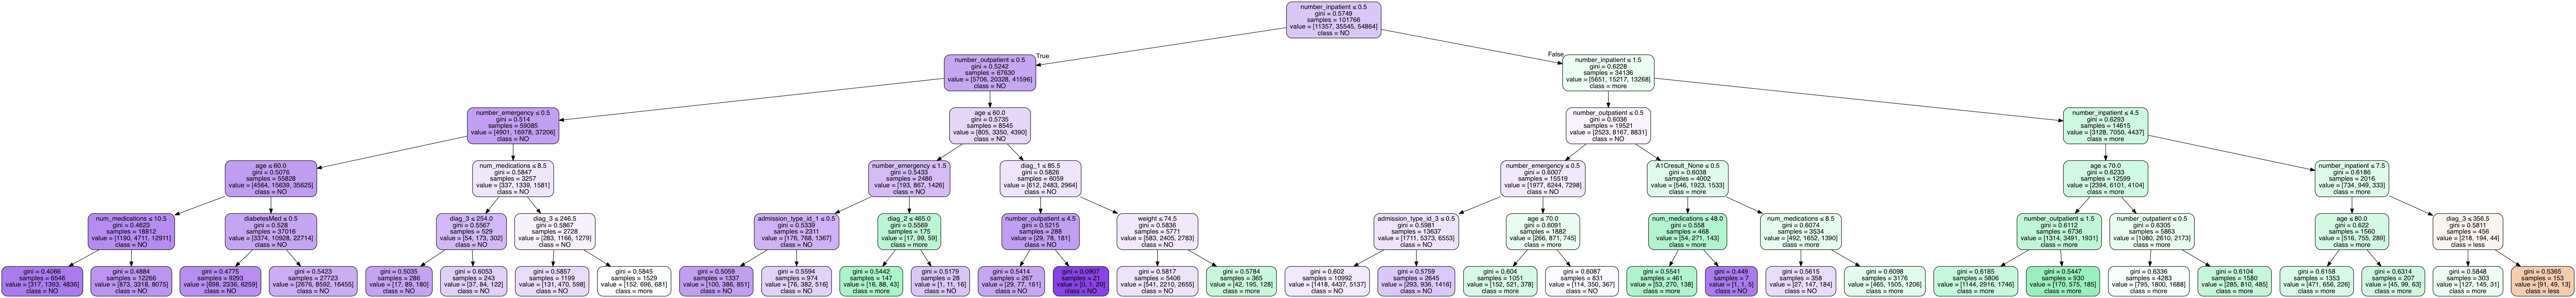

In [48]:
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=featureColumns,  
                         class_names=['less', 'more', 'NO'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())